# Models

Firstly, we need to import the libraries we will use.

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
import catboost as cat
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

Secondly, we need to load the data.

In [182]:
train = pd.read_csv('train_engineered.csv')
test = pd.read_csv('test_engineered.csv')

In [218]:
train_engineered = pd.read_csv('train_engineered.csv')
test_engineered = pd.read_csv('test_engineered.csv')
train['log_budget']=np.log1p(train['original_budget'])
test['log_budget']=np.log1p(test['original_budget'])
train_engineered['log_budget'] = np.log1p(train_engineered['budget_processed'])

In [183]:
# print the title of each column of the train dataset
print(train.columns.values)

['Unnamed: 0' 'id' 'belongs_to_collection' 'original_budget'
 'budget_processed' 'genre_rank' 'num_genres' 'has_homepage'
 'originally_english' 'topStudio' 'numTopStudios' 'num_studios'
 'studioRank' 'num_production_countries' 'topCountry' 'countryRank'
 'usa_produced' '1960s' '1970s' '1980s' '1990s' '2000s' '2010s'
 'mondayRelease' 'tuesdayRelease' 'wednesdayRelease' 'thursdayRelease'
 'fridayRelease' 'saturdayRelease' 'sundayRelease' 'Winter' 'Fall'
 'Spring' 'Summer' 'runtime_processed' 'spoken_english' 'num_languages'
 'has_tagline' 'num_keywords' 'numTopKeywords' 'keywordRank' 'cast_num'
 'topLeadActor' 'numTopActors' 'actorRanks' 'topActorRank' 'crew_num'
 'topLeadDirector' 'numTopDirectors' 'directorsRank' 'topLeadExecProd'
 'numTopExecProd' 'execProdRank' 'topLeadProducer' 'numTopProducers'
 'producersRank' 'topLeadComposer' 'numTopComposers' 'composersRank'
 'topLeadDirectorPhoto' 'numTopDirectorsPhoto' 'directorsPhotoRank'
 'topLeadEditor' 'numTopEditors' 'editorsRank' 'budge

In [184]:
# print the title of each column of the test dataset
print(test.columns.values)

['Unnamed: 0' 'id' 'belongs_to_collection' 'original_budget'
 'budget_processed' 'genre_rank' 'num_genres' 'has_homepage'
 'originally_english' 'topStudio' 'numTopStudios' 'num_studios'
 'studioRank' 'num_production_countries' 'topCountry' 'countryRank'
 'usa_produced' '1960s' '1970s' '1980s' '1990s' '2000s' '2010s'
 'mondayRelease' 'tuesdayRelease' 'wednesdayRelease' 'thursdayRelease'
 'fridayRelease' 'saturdayRelease' 'sundayRelease' 'Winter' 'Fall'
 'Spring' 'Summer' 'runtime_processed' 'spoken_english' 'num_languages'
 'has_tagline' 'num_keywords' 'numTopKeywords' 'keywordRank' 'cast_num'
 'topLeadActor' 'numTopActors' 'actorRanks' 'topActorRank' 'crew_num'
 'topLeadDirector' 'numTopDirectors' 'directorsRank' 'topLeadExecProd'
 'numTopExecProd' 'execProdRank' 'topLeadProducer' 'numTopProducers'
 'producersRank' 'topLeadComposer' 'numTopComposers' 'composersRank'
 'topLeadDirectorPhoto' 'numTopDirectorsPhoto' 'directorsPhotoRank'
 'topLeadEditor' 'numTopEditors' 'editorsRank' 'budge

In [219]:
#Model training, based on correlations extracted at DataAnalysis part
y2= train_engineered['log_revenue'].values
train_engineered['log_budget'] = np.log1p(train_engineered['budget_processed'])
test_engineered['log_budget'] = np.log1p(test_engineered['budget_processed'])
cols = ['belongs_to_collection','log_budget',
        'popularity','runtime_to_year_ratio','budget_to_year_ratio','inflationBudget','num_studios','num_production_countries',
        '1960s','1970s','1980s','1990s','2000s','2010s',
        'mondayRelease','tuesdayRelease','thursdayRelease','saturdayRelease','sundayRelease',
        'Winter','Fall','Summer','Spring','num_languages','num_keywords','numTopKeywords',
        'genre_rank', 'num_genres', 'has_homepage', 'originally_english', 'topStudio', 'numTopStudios',
        'studioRank', 'topCountry', 'countryRank', 'usa_produced',  'wednesdayRelease', 'fridayRelease', 'Spring',
        'runtime_processed', 'spoken_english', 'num_languages', 'has_tagline', 'keywordRank', 'cast_num', 'topLeadActor',
        'numTopActors', 'actorRanks', 'topActorRank', 'crew_num', 'topLeadDirector', 'numTopDirectors', 'directorsRank',
        'topLeadExecProd', 'numTopExecProd', 'execProdRank', 'topLeadProducer', 'numTopProducers', 'producersRank',
        'topLeadComposer', 'numTopComposers', 'composersRank', 'topLeadDirectorPhoto', 'numTopDirectorsPhoto',
        'directorsPhotoRank', 'topLeadEditor', 'numTopEditors', 'editorsRank', 'popularity_year_ratio']
X2 = train_engineered[cols].values
X_test= test_engineered[cols].values
X_test = np.nan_to_num(X_test)

In [223]:
#carry out leaner regression
LR = LinearRegression()
scores = cross_val_score(LR, X2, y2, scoring="neg_mean_squared_error", cv = 8)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

1.5639444182469926


In [224]:
LR.fit(X2,y2)
y_pred_LR_logbudget = LR.predict(X_test)
y_pred_LR_logbudget = np.expm1(y_pred_LR_logbudget)

In [225]:
pd.DataFrame({'id': test_engineered['id'], 'revenue': y_pred_LR_logbudget}).to_csv('submission_LR_logbudget.csv', index=False)
#2.43276

In [228]:
#carry out random forest regression
#with tuned parameters
#the result was improved from 3.1 to 2.3
RF = RandomForestRegressor(max_depth=200, min_samples_split=5,n_estimators=200)
RF.fit(X2,y2)
y_pred_RF = RF.predict(X_test)
y_pred_RF = np.expm1(y_pred_RF)
pd.DataFrame({'id': test_engineered['id'], 'revenue': y_pred_RF}).to_csv('submission_RF.csv', index=False)
#2.30702~2.31059

In [ ]:
#modifying the result based on data crapped from the IMDB data base
sample = pd.read_csv('data/test.csv')
#original test data with nothing modified
ref = pd.DataFrame({'id': test_engineered['id'], 'revenue': y_pred_RF,
              'sample': test_engineered['revenue']})
ref = ref.fillna(0)
l = len(ref)
for i in range(l):
    if(ref['sample'][i]>0):
        ref['revenue'][i] = ref['sample'][i]
pd.DataFrame({'id': ref['id'], 'revenue': ref['revenue']}).to_csv('modified_RF.csv', index=False)
#result is further improved to 2.2

## Error Detection Models
Error Detection Models are used to detect errors in the dataset. It is a classier that classifies the data into two classes: error and non-error. We will use lightgbm as our error detection model.

### 1. data preparation

Firstly, we need to prepare the data for the error detection model. We will use the data from the previous notebook. By plotting the distribution of the data, we can see seperation between the error and non-error data by recognizing the outliers and abnormal data.

C:\Users\zjy\AppData\Local\Temp\ipykernel_24004\4229348723.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['revenue'], kde=False)


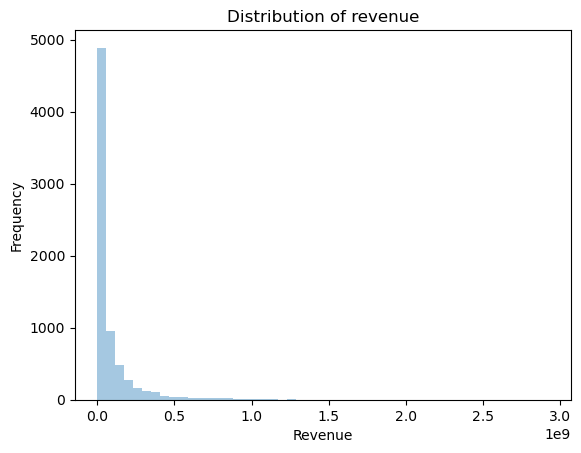

In [186]:
#plot the distribution of the revenue in the training set
sns.distplot(train['revenue'], kde=False)
plt.title('Distribution of revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_24004\1025018483.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['original_budget'], kde=False)


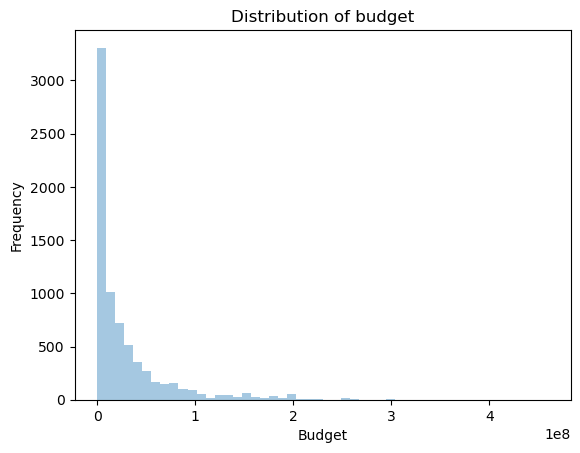

In [187]:
#plot the distribution of the budget in the training set
sns.distplot(train['original_budget'], kde=False)
plt.title('Distribution of budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_24004\668996526.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['log_revenue'], kde=False)


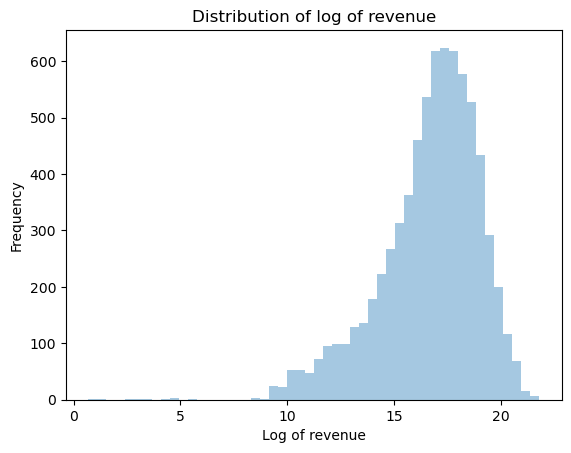

In [188]:
# plot the distribution of the log of the revenue in the training set
sns.distplot(train['log_revenue'], kde=False)
plt.title('Distribution of log of revenue')
plt.xlabel('Log of revenue')
plt.ylabel('Frequency')
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_24004\3171513416.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['log_budget'], kde=False)


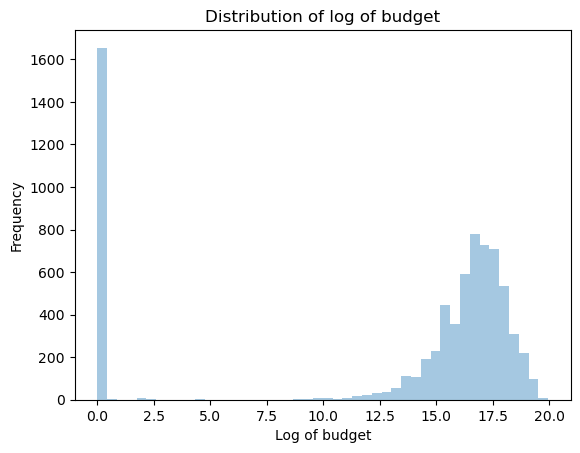

In [189]:
# plot the distribution of the log of the budget in the training set
sns.distplot(train['log_budget'], kde=False)
plt.title('Distribution of log of budget')
plt.xlabel('Log of budget')
plt.ylabel('Frequency')
plt.show()

By seeing the graph above, we will divide the data into two parts: error and non-error and label them as 1 and 0 respectively. We will use these labels to train the error detection model.

In [190]:
#store all the data that is zero in budget or revenue in a new dataframe called error
#store all the data that is not zero in budget or revenue in a new dataframe called non_error_train
error_train = train[(train['revenue'] == 0) | (train['original_budget'] == 0)]
non_error_train = train[(train['original_budget'] != 0) & (train['revenue'] != 0)]
#move all the data whose log_budegt is less than 10 in non-error to the error dataframe
temp = non_error_train[non_error_train['log_budget'] < 10]
error_train = error_train._append(temp, ignore_index=True)
non_error_train = non_error_train[non_error_train['log_budget'] >= 10]
#move all the data whose log_revenue is less than 7.5 in non-error to the error dataframe
temp = non_error_train[non_error_train['log_revenue'] < 7.5]
error_train = error_train._append(temp, ignore_index=True)
non_error_train = non_error_train[non_error_train['log_revenue'] >= 7.5]

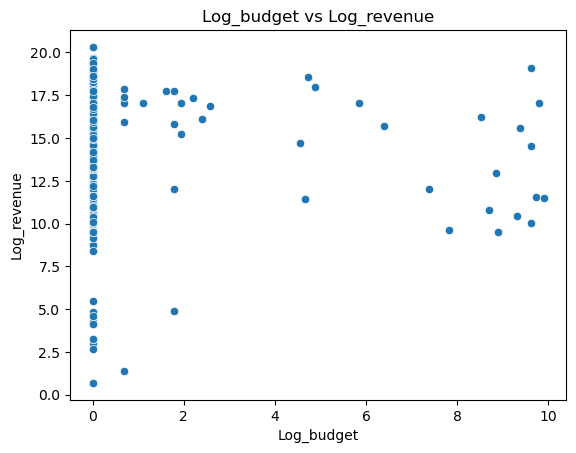

In [191]:
#plot the distribution of the log_budegt against the log_revenue in the error set
sns.scatterplot(x='log_budget', y='log_revenue', data=error_train)
plt.title('Log_budget vs Log_revenue')
plt.xlabel('Log_budget')
plt.ylabel('Log_revenue')
plt.show()

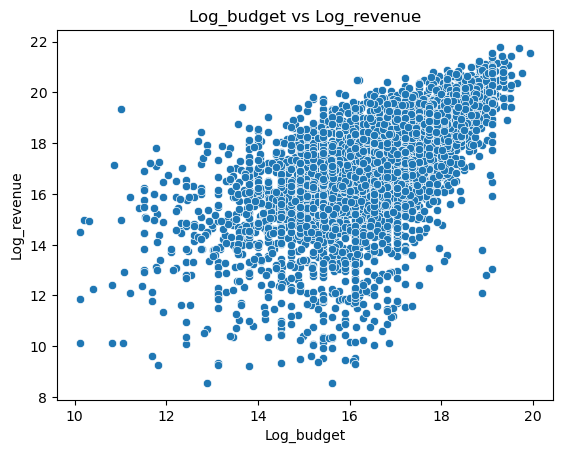

In [192]:
#plot the distribution of the log_budegt against the log_revenue in the non-error set
sns.scatterplot(x='log_budget', y='log_revenue', data=non_error_train)
plt.title('Log_budget vs Log_revenue')
plt.xlabel('Log_budget')
plt.ylabel('Log_revenue')
plt.show()

In [193]:
#label the error set as 1 and the non-error set as 0
error_train['error'] = 1
non_error_train['error'] = 0
#combine the error and non-error set
train_labeled = error_train._append(non_error_train, ignore_index=True)

In [194]:
# split the training set into training and validation set, with a evenly distributed error and non-error set
train_labeled, val_labeled = train_test_split(train_labeled, test_size=0.2, random_state=42, stratify=train_labeled['error'])

### 2. training

In [195]:
# feature_classification selection
feature_classification = [ 'original_budget', 'budget_processed', 'genre_rank',
                            'inflationBudget', 'popularity_year_ratio']
# target
target = 'error'

# split the feature_classification and target in the training set
X_train = train_labeled[feature_classification]
y_train = train_labeled[target]
# split the feature_classification and target in the validation set
X_val = val_labeled[feature_classification]
y_val = val_labeled[target]

# create a lgb dataset for training
train_data = lgb.Dataset(X_train, label=y_train)
# create a lgb dataset for validation
val_data = lgb.Dataset(X_val, label=y_val)

# set the parameters for the lgb model
param = {'num_leaves': 30,
          'objective': 'binary',
          'metric': 'auc',
          'max_depth': 5,
          'learning_rate': 0.1,
          'feature_fraction': 0.9,
          'min_data_in_leaf': 5,
          'bagging_fraction': 0.9,
          'bagging_freq': 1,
          'lambda_l1': 1,
          'lambda_l2': 1,
          'verbose': -1}
# train the lgb model
lgb_error_detection = lgb.train(param, train_data, valid_sets=[val_data])

# predict the validation set
y_pred = lgb_error_detection.predict(X_val, num_iteration=lgb_error_detection.best_iteration)
# convert the prediction to binary
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

# calculate the accuracy, precision, recall and f1 score
accuracy = sum(y_pred == y_val) / len(y_val)
print(accuracy)
precision = sum((y_pred == 1) & (y_val == 1)) / sum(y_pred == 1)
print(precision)
recall = sum((y_pred == 1) & (y_val == 1)) / sum(y_val == 1)
print(recall)
f1 = 2 * precision * recall / (precision + recall)
print(f1)

0.9993141289437586
1.0
0.9970414201183432
0.9985185185185186


### 3. save the model

In [196]:
# save the model
lgb_error_detection.save_model('model/lgb_error_detection.pkl')

### 4. prediction

In [197]:
# predict the test set
y_pred = lgb_error_detection.predict(test[feature_classification], num_iteration=lgb_error_detection.best_iteration)
# convert the prediction to binary
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
test['error'] = y_pred

In [198]:
# predict the error set using the error detection model
y_pred = lgb_error_detection.predict(error_train[feature_classification], num_iteration=lgb_error_detection.best_iteration)
# convert the prediction to binary
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
error_train['error'] = y_pred

# split the test set into error and non-error set
error_test = test[test['error'] == 1]
non_error_test = test[test['error'] == 0]

In [199]:
print(error_test.shape)
print(non_error_test.shape)

(1256, 72)
(3142, 72)


## Models for revenue prediction

### 1. Model for error-free data

we will use 3 models: lightgbm, xgboost, and catboost. Then we will use the average of the predictions of these models as our final prediction.

Use Five-Fold Cross Validation to Evaluate the Model

In [200]:
# split the training set into training and validation set, use Five-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# feature selection
#'belongs_to_collection' 'original_budget'
#  'budget_processed' 'genre_rank' 'num_genres' 'has_homepage'
#  'originally_english' 'topStudio' 'numTopStudios' 'num_studios'
#  'studioRank' 'num_production_countries' 'topCountry' 'countryRank'
#  'usa_produced' '1960s' '1970s' '1980s' '1990s' '2000s' '2010s'
#  'mondayRelease' 'tuesdayRelease' 'wednesdayRelease' 'thursdayRelease'
#  'fridayRelease' 'saturdayRelease' 'sundayRelease' 'Winter' 'Fall'
#  'Spring' 'Summer' 'runtime_processed' 'spoken_english' 'num_languages'
#  'has_tagline' 'num_keywords' 'numTopKeywords' 'keywordRank' 'cast_num'
#  'topLeadActor' 'numTopActors' 'actorRanks' 'topActorRank' 'crew_num'
#  'topLeadDirector' 'numTopDirectors' 'directorsRank' 'topLeadExecProd'
#  'numTopExecProd' 'execProdRank' 'topLeadProducer' 'numTopProducers'
#  'producersRank' 'topLeadComposer' 'numTopComposers' 'composersRank'
#  'topLeadDirectorPhoto' 'numTopDirectorsPhoto' 'directorsPhotoRank'
#  'topLeadEditor' 'numTopEditors' 'editorsRank' 'budget_to_year_ratio'
#  'runtime_to_year_ratio' 'inflationBudget' 'popularity'
#  'popularity_year_ratio'

non_error_train['log_budget']=np.log1p(non_error_train['budget_processed'])
non_error_test['log_budget']=np.log1p(non_error_test['budget_processed'])
error_train['log_budget']=np.log1p(error_train['budget_processed'])
error_test['log_budget']=np.log1p(error_test['budget_processed'])

feature_regression = [  'belongs_to_collection','original_budget','budget_processed', 'genre_rank',
                        'num_genres', 'has_homepage', 'originally_english', 'topStudio', 'numTopStudios',
                        'num_studios', 'studioRank', 'num_production_countries', 'topCountry', 'countryRank',
                        'usa_produced', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'mondayRelease',
                        'tuesdayRelease', 'wednesdayRelease', 'thursdayRelease', 'fridayRelease', 'saturdayRelease',
                        'sundayRelease', 'Winter', 'Fall', 'Spring', 'Summer', 'runtime_processed', 'spoken_english',
                        'num_languages', 'has_tagline', 'num_keywords', 'numTopKeywords', 'keywordRank', 'cast_num',
                        'topLeadActor', 'numTopActors', 'actorRanks', 'topActorRank', 'crew_num', 'topLeadDirector',
                        'numTopDirectors', 'directorsRank', 'topLeadExecProd', 'numTopExecProd', 'execProdRank',
                        'topLeadProducer', 'numTopProducers', 'producersRank', 'topLeadComposer', 'numTopComposers',
                        'composersRank', 'topLeadDirectorPhoto', 'numTopDirectorsPhoto', 'directorsPhotoRank',
                        'topLeadEditor', 'numTopEditors', 'editorsRank', 'budget_to_year_ratio',
                        'runtime_to_year_ratio', 'inflationBudget', 'popularity', 'popularity_year_ratio','log_budget']
target = 'revenue'

C:\Users\zjy\AppData\Local\Temp\ipykernel_24004\621629304.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_error_test['log_budget']=np.log1p(non_error_test['budget_processed'])
C:\Users\zjy\AppData\Local\Temp\ipykernel_24004\621629304.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_test['log_budget']=np.log1p(error_test['budget_processed'])


In [ ]:
train_engineered = pd.read_csv('data/train_engineered.csv')
test_engineered = pd.read_csv('data/test_engineered.csv')

In [201]:
# lightgbm
# set the parameters for the lgb model
param = {'num_leaves': 500,
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth': 12,
          'learning_rate': 0.1,
          'feature_fraction': 0.9,
          'min_data_in_leaf': 5,
          'bagging_fraction': 0.9,
          'bagging_freq': 1,
          'lambda_l1': 0.2,
          'lambda_l2': 1,
          'verbose': -1}
# train the lgb model
lgb_model_non_error = []
lgb_prediction = []
for train_index, val_index in kf.split(non_error_train):
    X_train, X_val = non_error_train.iloc[train_index][feature_regression], non_error_train.iloc[val_index][feature_regression]
    y_train, y_val = non_error_train.iloc[train_index][target], non_error_train.iloc[val_index][target]
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    lgb_model = lgb.train(param, train_data, valid_sets=[val_data])
    lgb_model_non_error.append(lgb_model)
    # evaluate the model
    y_pred = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)
    lgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)



109109323.28609982
105566079.01545516
98798956.76940988
106021158.92583655
87628617.99277397


In [202]:
# xgboost
# set the parameters for the xgb model
param = {'objective': 'reg:squarederror', 
              'eta': 0.035, 
              'max_depth': 13, 
              'subsample': 0.6, 
              'colsample_bytree': 0.7,  
              'eval_metric': 'rmse', 
}
# train the xgb model
xgb_model_non_error = []
xgb_prediction = []
for train_index, val_index in kf.split(non_error_train):
    X_train, X_val = non_error_train.iloc[train_index][feature_regression], non_error_train.iloc[val_index][feature_regression]
    y_train, y_val = non_error_train.iloc[train_index][target], non_error_train.iloc[val_index][target]
    train_data = xgb.DMatrix(X_train, label=y_train)
    val_data = xgb.DMatrix(X_val, label=y_val)
    xgb_model = xgb.train(param, train_data, evals=[(val_data, 'validation')])
    xgb_model_non_error.append(xgb_model)
    # evaluate the model
    y_pred = xgb_model.predict(val_data)
    xgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)


[0]	validation-rmse:227818399.47018


[1]	validation-rmse:223237348.75983
[2]	validation-rmse:218706364.80925
[3]	validation-rmse:214615863.34317
[4]	validation-rmse:210864715.52790
[5]	validation-rmse:207080382.46683
[6]	validation-rmse:203297796.93457
[7]	validation-rmse:199486411.76863
[8]	validation-rmse:196131920.32723
[9]	validation-rmse:192708665.45028


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

192708664.8755707
[0]	validation-rmse:246201074.03102
[1]	validation-rmse:240572866.71489
[2]	validation-rmse:235071521.74500
[3]	validation-rmse:230074543.37885
[4]	validation-rmse:225303550.59726
[5]	validation-rmse:221102081.58238
[6]	validation-rmse:216190561.89900
[7]	validation-rmse:212170191.31710
[8]	validation-rmse:208204643.53454
[9]	validation-rmse:204261305.28331
204261304.27768382
[0]	validation-rmse:207445677.10658
[1]	validation-rmse:203188918.45676
[2]	validation-rmse:198521470.87676
[3]	validation-rmse:194448677.31418
[4]	validation-rmse:190658926.00620
[5]	validation-rmse:186853452.69695
[6]	validation-rmse:182748336.04736
[7]	validation-rmse:179506820.61205
[8]	validation-rmse:176084970.55254
[9]	validation-rmse:173326893.07976
173326891.80452088


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

[0]	validation-rmse:196779251.18947
[1]	validation-rmse:192398691.19116
[2]	validation-rmse:187876063.19574
[3]	validation-rmse:183538668.73075
[4]	validation-rmse:179574614.81869
[5]	validation-rmse:175472695.12316
[6]	validation-rmse:171796717.00811
[7]	validation-rmse:168068151.83597
[8]	validation-rmse:164541707.52957
[9]	validation-rmse:161718461.20264
161718460.94182026
[0]	validation-rmse:208880650.99865
[1]	validation-rmse:203800863.47805
[2]	validation-rmse:199298867.62427
[3]	validation-rmse:194182391.83287
[4]	validation-rmse:189457150.63381
[5]	validation-rmse:185344631.31024
[6]	validation-rmse:181166034.58134
[7]	validation-rmse:176961793.77268
[8]	validation-rmse:172544969.76826
[9]	validation-rmse:168424470.70731
168424470.8396143


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

In [203]:
# catboost
# set the parameters for the cat model
param = {'iterations' : 2000,
        'learning_rate':0.07,
        'depth':10,
        'eval_metric':'RMSE',
        'colsample_bylevel':0.8,
        'bagging_temperature' : 0.4,
        'metric_period' : None,
        'early_stopping_rounds':200,
        'verbose': False
}
# train the cat model
cat_model_non_error = []
cat_prediction = []
for train_index, val_index in kf.split(non_error_train):
    X_train, X_val = non_error_train.iloc[train_index][feature_regression], non_error_train.iloc[val_index][feature_regression]
    y_train, y_val = non_error_train.iloc[train_index][target], non_error_train.iloc[val_index][target]
    train_data = cat.Pool(X_train, label=y_train)
    val_data = cat.Pool(X_val, label=y_val)
    cat_model = cat.CatBoostRegressor(**param)
    cat_model.fit(train_data, eval_set=val_data)
    cat_model_non_error.append(cat_model)
    # evaluate the model
    y_pred = cat_model.predict(val_data)
    cat_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)

113752941.6868511
113368690.6985377
94560956.53176838
101486070.47846329
93464782.10233791


In [204]:
# predict function
def prediction(model, data):
    pred = []
    for i in range(len(model)):
        pred.append(model[i].predict(data))
    pred = np.array(pred)
    pred = np.mean(pred, axis=0)
    return pred

In [205]:
# # train a linear regression model to adjust the prediction of the three models

# predict the training set using the three models
lgb_train = prediction(lgb_model_non_error, non_error_train[feature_regression])
xgb_train = prediction(xgb_model_non_error, xgb.DMatrix(non_error_train[feature_regression]))
cat_train = prediction(cat_model_non_error, cat.Pool(non_error_train[feature_regression]))

# combine the prediction of the three models
train_pred = np.array([lgb_train, xgb_train, cat_train])
train_pred = np.transpose(train_pred)
# train a linear regression model
lr_non_error = LinearRegression()
lr_non_error.fit(train_pred, non_error_train[target])



d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


LinearRegression()

### 2. Model for error data

In [206]:
# lightgbm
# set the parameters for the lgb model
param = {'num_leaves': 500,
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth': 12,
          'learning_rate': 0.1,
          'feature_fraction': 0.95,
          'min_data_in_leaf': 5,
          'bagging_fraction': 0.9,
          'bagging_freq': 1,
          'lambda_l1': 0.2,
          'lambda_l2': 1,
          'verbose': -1}

# train the lgb model
lgb_model_error = []
lgb_prediction = []
for train_index, val_index in kf.split(error_train):
    X_train, X_val = error_train.iloc[train_index][feature_regression], error_train.iloc[val_index][feature_regression]
    y_train, y_val = error_train.iloc[train_index][target], error_train.iloc[val_index][target]
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    lgb_model = lgb.train(param, train_data, valid_sets=[val_data])
    lgb_model_error.append(lgb_model)
    # evaluate the model
    y_pred = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)
    lgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)


18832224.4841515
27995015.14529116
22698737.622587197
32099990.0559448
19444636.56191545


In [207]:
# xgboost
# set the parameters for the xgb model
param = {'objective': 'reg:squarederror', 
              'eta': 0.035, 
              'max_depth': 13, 
              'subsample': 0.6, 
              'colsample_bytree': 0.7,  
              'eval_metric': 'rmse', 
}
# train the xgb model
xgb_model_error = []
xgb_prediction = []
for train_index, val_index in kf.split(error_train):
    X_train, X_val = error_train.iloc[train_index][feature_regression], error_train.iloc[val_index][feature_regression]
    y_train, y_val = error_train.iloc[train_index][target], error_train.iloc[val_index][target]
    train_data = xgb.DMatrix(X_train, label=y_train)
    val_data = xgb.DMatrix(X_val, label=y_val)
    xgb_model = xgb.train(param, train_data, evals=[(val_data, 'validation')])
    xgb_model_error.append(xgb_model)
    # evaluate the model
    y_pred = xgb_model.predict(val_data)
    xgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)


[0]	validation-rmse:29147566.92283
[1]	validation-rmse:28454135.00974
[2]	validation-rmse:27820700.82881


[3]	validation-rmse:27324126.21378
[4]	validation-rmse:26742300.55134
[5]	validation-rmse:26053077.05514
[6]	validation-rmse:25478829.85432
[7]	validation-rmse:24997572.34685
[8]	validation-rmse:24707232.19042
[9]	validation-rmse:24351208.89863
24351208.98845471
[0]	validation-rmse:44255578.49231
[1]	validation-rmse:43627693.14015
[2]	validation-rmse:42836534.74271
[3]	validation-rmse:42473289.26638


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

[4]	validation-rmse:41911572.60265
[5]	validation-rmse:41327412.90391
[6]	validation-rmse:40757320.73281
[7]	validation-rmse:40254898.20946
[8]	validation-rmse:39725108.13511
[9]	validation-rmse:39307936.26633
39307936.61681087
[0]	validation-rmse:33591604.56976
[1]	validation-rmse:32930060.71427
[2]	validation-rmse:32483403.96530
[3]	validation-rmse:32192978.09840
[4]	validation-rmse:31723125.83116
[5]	validation-rmse:31336324.57816
[6]	validation-rmse:31047206.69751
[7]	validation-rmse:30505457.72085
[8]	validation-rmse:30222101.96164
[9]	validation-rmse:29814775.54874
29814775.525893066
[0]	validation-rmse:46509799.23408
[1]	validation-rmse:45692783.62077
[2]	validation-rmse:44949317.63112


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

[3]	validation-rmse:44459128.80238
[4]	validation-rmse:43793164.09423
[5]	validation-rmse:43141369.82664
[6]	validation-rmse:42672247.79148
[7]	validation-rmse:42422069.62636
[8]	validation-rmse:42262555.84714
[9]	validation-rmse:41748013.86867
41748015.45977836
[0]	validation-rmse:33864108.61611
[1]	validation-rmse:33284226.60431
[2]	validation-rmse:32452973.03140
[3]	validation-rmse:32001175.97847
[4]	validation-rmse:31206102.97681
[5]	validation-rmse:30528353.81171
[6]	validation-rmse:30142719.12898
[7]	validation-rmse:29785945.95563
[8]	validation-rmse:29282998.55943
[9]	validation-rmse:28912389.55972
28912389.684331506


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

In [208]:
# catboost
# set the parameters for the cat model
param = {'iterations' : 2000,
        'learning_rate':0.07,
        'depth':10,
        'eval_metric':'RMSE',
        'colsample_bylevel':0.8,
        'bagging_temperature' : 0.4,
        'metric_period' : None,
        'early_stopping_rounds':200,
        'verbose': False
}
# train the cat model
cat_model_error = []
cat_prediction = []
for train_index, val_index in kf.split(error_train):
    X_train, X_val = error_train.iloc[train_index][feature_regression], error_train.iloc[val_index][feature_regression]
    y_train, y_val = error_train.iloc[train_index][target], error_train.iloc[val_index][target]
    train_data = cat.Pool(X_train, label=y_train)
    val_data = cat.Pool(X_val, label=y_val)
    cat_model = cat.CatBoostRegressor(**param)
    cat_model.fit(train_data, eval_set=val_data)
    cat_model_error.append(cat_model)
    # evaluate the model
    y_pred = cat_model.predict(val_data)
    cat_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)
    

16081756.050937673
30638415.582608394
22225070.13111147
36230488.22467325
20909977.087877672


In [209]:
# train a linear regression model to adjust the prediction of the three models

lgb_train = prediction(lgb_model_error, error_train[feature_regression])
# data = xgb.DMatrix(error_train[feature_regression], label=error_train[target])
xgb_train = prediction(xgb_model_error, xgb.DMatrix(error_train[feature_regression]))
cat_train = prediction(cat_model_error, cat.Pool(error_train[feature_regression]))

# combine the prediction of the three models
train_pred = np.array([lgb_train, xgb_train, cat_train])
train_pred = np.transpose(train_pred)
# train a linear regression model
lr_error = LinearRegression()
lr_error.fit(train_pred, error_train[target])


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


LinearRegression()

## Prediction

### 1. Prediction for error-free data

In [213]:
coef = [0.025, 0.95, 0.025]

# predict the non-error set using the three models
lgb_non_error = prediction(lgb_model_non_error, non_error_test[feature_regression])
xgb_non_error = prediction(xgb_model_non_error, xgb.DMatrix(non_error_test[feature_regression]))
cat_non_error = prediction(cat_model_non_error, cat.Pool(non_error_test[feature_regression]))

# predict the non-error set using the linear regression model
y_pred = coef[0] * lgb_non_error + coef[1] * xgb_non_error + coef[2] * cat_non_error
#y_pred = np.mean([lgb_non_error, xgb_non_error, cat_non_error], axis=0)
#y_pred = lr_non_error.predict(np.array([lgb_non_error, xgb_non_error, cat_non_error]).T)

non_error_test['revenue'] = abs(y_pred)

print(non_error_test.shape)
# predict the error set using the three models
lgb_error = prediction(lgb_model_error, error_test[feature_regression])
xgb_error = prediction(xgb_model_error, xgb.DMatrix(error_test[feature_regression]))
cat_error = prediction(cat_model_error, cat.Pool(error_test[feature_regression]))

# predict the error set using the linear regression model
y_pred = coef[0] * lgb_error + coef[1] * xgb_error + coef[2] * cat_error
#y_pred = lr_error.predict(np.array([lgb_error, xgb_error, cat_error]).T)

error_test['revenue'] = abs(y_pred)


(3142, 73)


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

In [214]:
# combine the error and non-error set
test = error_test._append(non_error_test, ignore_index=True)

In [215]:
df_sub = pd.DataFrame()
sub= ['id','revenue']
df_sub[sub]=test[sub]
df_sub.to_csv("submission1.csv", index=False)